# Implement the Kuramoto Order parameter from spiking data

### Compute individual phase

$$
\phi_j(t) = 2\pi \frac{t - t_s^j}{t^j_{s+1} - t^j_s},\\
$$
$t_s < t < t_{s+1}$, and $\phi\in\{0,2\pi\}$. Where $t$ is time, and $t_s$ the spike time of the $j$ neuron.

### Kuramoto order parameter (r)

$$
r(t) = \Big|\frac{1}{N} \sum_{j=1}^N {\rm e}^{i\phi_j(t)}\Big|,
$$

or

$$
\overline{r} = \Big< \Big| \frac{1}{N} \sum_{j=1}^N {\rm e}^{i\phi_j} \Big|\Big>,
$$

$r\in\{0,1\}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd

from IPython.core.display import display, HTML
display(HTML('<style>.container {width:100% !important;}</style>'))

/tmp/ipykernel_43414/3081815625.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
%matplotlib notebook

In [3]:
data = pd.read_csv("Raster_IpopA_0.004000_IpopB_0.004000_gext_1.000_noise_0.00000.dat", sep = '\t', header = None)

<IPython.core.display.Javascript object>


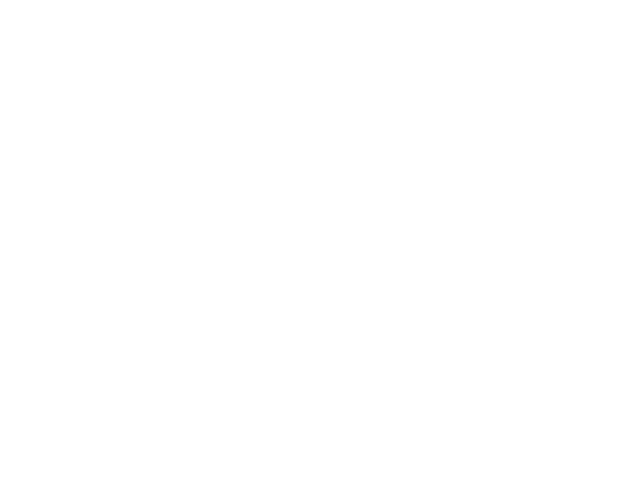

In [4]:
idxs = np.where(data[0] > 15000)[0] #cutting transient
spikes = {}
spikes[0] = np.asarray(data[0][idxs]) # time spike
spikes[1] = np.asarray(data[1][idxs]) # neuron label

plt.figure()
plt.scatter(spikes[0], spikes[1], s = 0.5)
plt.xlabel("Time (ms)", fontsize = 12)
plt.ylabel("Neuron", fontsize = 12)
plt.show()

In [5]:
spkt = []
for sp in spikes[0]: spkt.append(float('%.2f'%(sp))) #round the spike time to be recognized
spkt = np.asarray(spkt)

In [6]:
# Filter neurons with X or more spikes
thrs_spks = 10
filt_neurons = [] # these neurons will have more than thrs_spks

labels = np.unique(spikes[1])
for idx in labels:
    if len(np.where(spikes[1] == idx)[0]) > thrs_spks:
        filt_neurons.append(int(idx))
        
# We need to define what is the intervals where all the neurons have phase already defined
first_spikes = []
last_spikes = []
for idx in filt_neurons:
    first_spikes.append(spkt[np.where(spikes[1] == idx)[0][0]])
    last_spikes.append(spkt[np.where(spikes[1] == idx)[0][-1]])
    
last_first_spk = np.min(last_spikes) # define the end of interval
first_last_spk = np.max(first_spikes) # define the start of interval

In [7]:
ttotal = spkt[-1] - spkt[0]
time_vec = np.linspace(spkt[0], spkt[-1], int(ttotal / 0.01))

phase = np.ones((len(filt_neurons), len(time_vec))) * -1

for z, neuron_label in enumerate(filt_neurons):
    idx_individual_spikes = np.where(spikes[1] == neuron_label)[0]
    individual_spkt = spkt[idx_individual_spikes]
    for i, t in enumerate(individual_spkt[:-1]):
        ti = np.where(time_vec >= t)[0][0]
        tf = np.where(time_vec >= individual_spkt[i+1])[0][0]
        phase[z][ti:tf] = np.linspace(0, 2. * np.pi, (tf-ti))
        
# cut the interval where phase is defined everywhere
idxs = np.where((time_vec > first_last_spk) & (time_vec < last_first_spk))[0]
phase = phase[:,idxs]

<IPython.core.display.Javascript object>


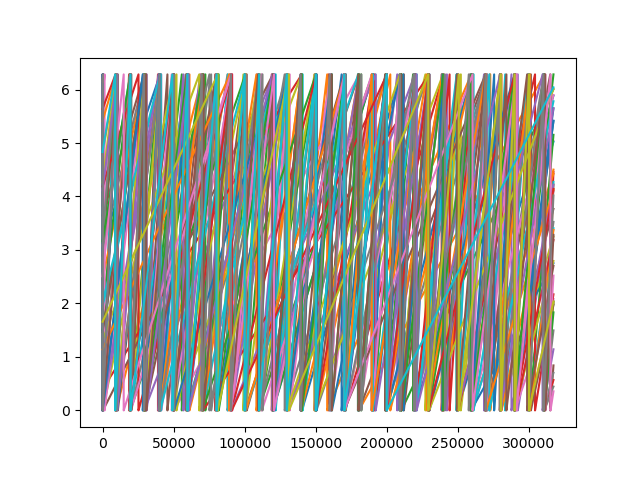

In [8]:
plt.figure()
for z in range(len(phase)):
    plt.plot(phase[z])
plt.show()

In [11]:
np.shape(phase)[1]

317185

In [16]:
kuramoto=[]
for i in range(np.shape(phase)[1]):
    sumphases = 0
    for j in range(np.shape(phase)[0]):
        sumphases += np.exp(complex(0,phase[j][i]))
    kuramoto.append(float((1./np.shape(phase)[0]) * abs(sumphases)))

<IPython.core.display.Javascript object>


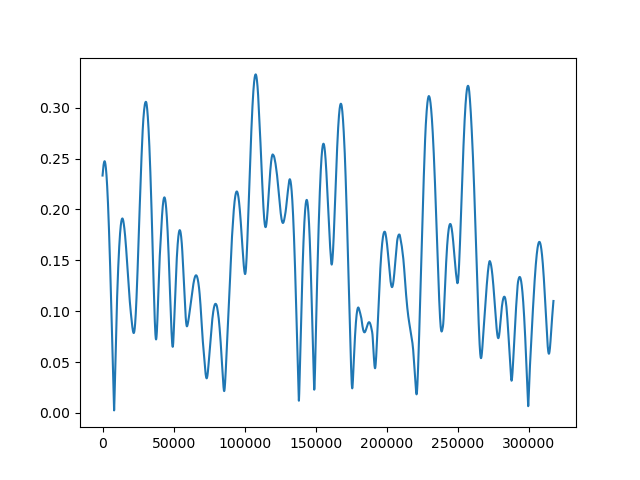

In [17]:
plt.figure()
plt.plot(kuramoto)
plt.show()

In [19]:
np.mean(kuramoto)

0.15076695589859324